In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading the CSV and printing the top 5 rows
df = pd.read_csv('https://raw.githubusercontent.com/ybifoundation/Dataset/main/Salary%20Data.csv')
df.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


Text(0, 0.5, 'Salary')

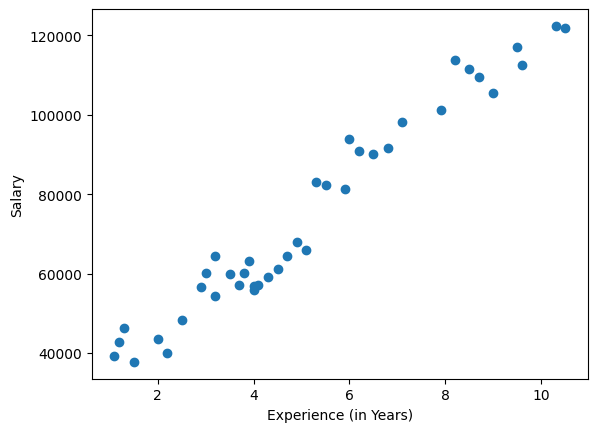

In [3]:
#segregating i/p (Experience Years)-o/p (Salary) variables and plotting the same
X = df.iloc[:,0:1]
y = df.iloc[:,-1]
plt.scatter(X,y)
plt.xlabel('Experience (in Years)')
plt.ylabel('Salary')

In [4]:
#splitting into training and testing data with 50-50 train-test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=2)

In [5]:
#importing 'LinearRegression' class from module 'linear_model' under Scikit-learn library
from sklearn.linear_model import LinearRegression
#creating an object of 'LinearRegression' class
lin_reg = LinearRegression()
#calling the 'fit' method to train the Linear Regression model
lin_reg.fit(X_train,y_train)

LinearRegression()

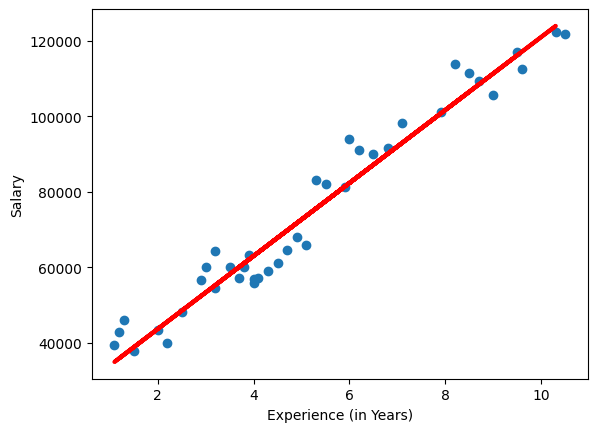

In [7]:
plt.scatter(X,y)
plt.xlabel('Experience (in Years)')
plt.ylabel('Salary')
#predicting the output variable and plotting the Linear Regression line
y_pred = lin_reg.predict(X_test)
plt.plot(X_test,y_pred,color='red',linewidth=3,label='Scikit-learn')

In [8]:
#calculating slope and intercept
print('Slope (with Scikit-learn): ',lin_reg.coef_)
print('Intercept (with Scikit-learn): ',lin_reg.intercept_)

#calculating R2-Score
from sklearn.metrics import r2_score
print('R2 Score (with Scikit-learn): ',r2_score(y_test,y_pred))

Slope (with Scikit-learn):  [9676.40055178]
Intercept (with Scikit-learn):  24324.955224555604
R2 Score (with Scikit-learn):  0.9619270377919448


Slope (with Gradient Descent):  9676.401349162768
Intercept (with Gradient Descent):  24324.950194319765
R2 Score (with Gradient Descent):  0.961927029445089


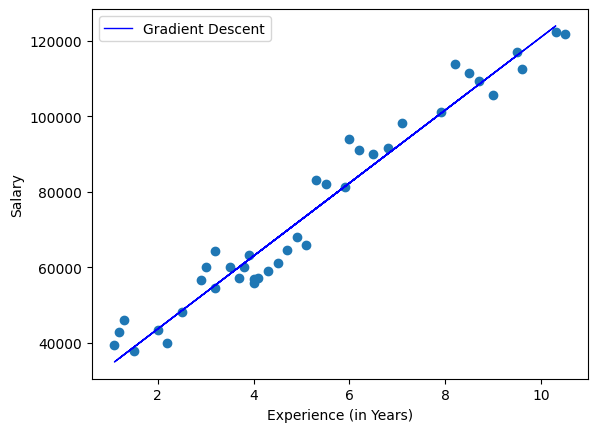

In [10]:
#creating a dedicated class for Gradient Descent

#class
class myGD:

    #constructor with inputs Learning Rate and No. of Iterations
    def __init__(self,learning_rate,epochs):
        #initializing slope and intercept
        self.m = 0 
        self.b = 0
        #setting up 'learning_rate' and 'epochs'
        self.learning_rate = learning_rate
        self.epochs = epochs

    #method_1: fitting the model
    def model_fit(self,X,y):
        #making sure input-output variables as 1-D array 
        X = np.array(X).ravel()
        y = np.array(y).ravel()
        #iterating to converge the slope and intercept of LR line
        for i in range(self.epochs):
            #calculating the slopes of loss function w.r.t 'm' and 'b'
            lossfunc_slope_m = -2 * np.sum((y - self.m*X - self.b) * X)
            lossfunc_slope_b = -2 * np.sum(y - self.m*X - self.b)
            #updating the slope and intercept of LR line
            self.m = self.m - (self.learning_rate*lossfunc_slope_m)
            self.b = self.b - (self.learning_rate*lossfunc_slope_b)
        #printing out the final slope and intercept of LR line
        print('Slope (with Gradient Descent): ',self.m)
        print('Intercept (with Gradient Descent): ',self.b)

    #method_2: predicting the output
    def prediction(self,X):
        return self.m * X + self.b

#creating an object of the defined class 'myGD' with i/p 'learning_rate', 'epochs'
#learning_rate = 0.001
#epochs = 1880
gd_obj = myGD(0.001,1880)
#calling the 'model_fit' method to train the model 
gd_obj.model_fit(X_train,y_train)
#calling the 'prediction' method to predict the o/p
y_predict = gd_obj.prediction(X_test)

#plotting the LR line found through Gradient Descent
plt.scatter(X,y)
plt.xlabel('Experience (in Years)')
plt.ylabel('Salary')
plt.plot(X_test,y_predict,color='blue',linewidth=1,label='Gradient Descent')
plt.legend()

#calculating R2-Score
from sklearn.metrics import r2_score
print('R2 Score (with Gradient Descent): ',r2_score(y_test,y_predict))